<a href="https://colab.research.google.com/github/mustafadonder/MD/blob/master/dataAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# !cp /content/AB_NYC_2019.csv -r /content

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
sns.set(rc={"figure.figsize":(20, 10)})

In [25]:
df = pd.read_csv("AB_NYC_2019.csv", delimiter=",", encoding="UTF-8")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
df.drop(["name", "id", "host_id", "host_name"], inplace=True, axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
integers = ["minimum_nights","number_of_reviews", "calculated_host_listings_count", "availability_365"]

for column in integers:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*df[column].std()) + df[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values

  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean  # change outlier values with mean
    df[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    df[column].fillna(df[column].mean(), inplace=True)  # just fill nan values with mean

  df[column] = df[column].astype("int64")  # the type will be converted to int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [30]:
floats = ["price", "reviews_per_month", "calculated_host_listings_count", "latitude", "longitude"]

for column in floats:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*df[column].std()) + df[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values

  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean  # change outlier values with mean
    df[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    df[column].fillna(df[column].mean(), inplace=True)  # filling NA values with mean

  df[column] = df[column].astype("float64") #converting the type to int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(

<Axes: xlabel='price', ylabel='Count'>

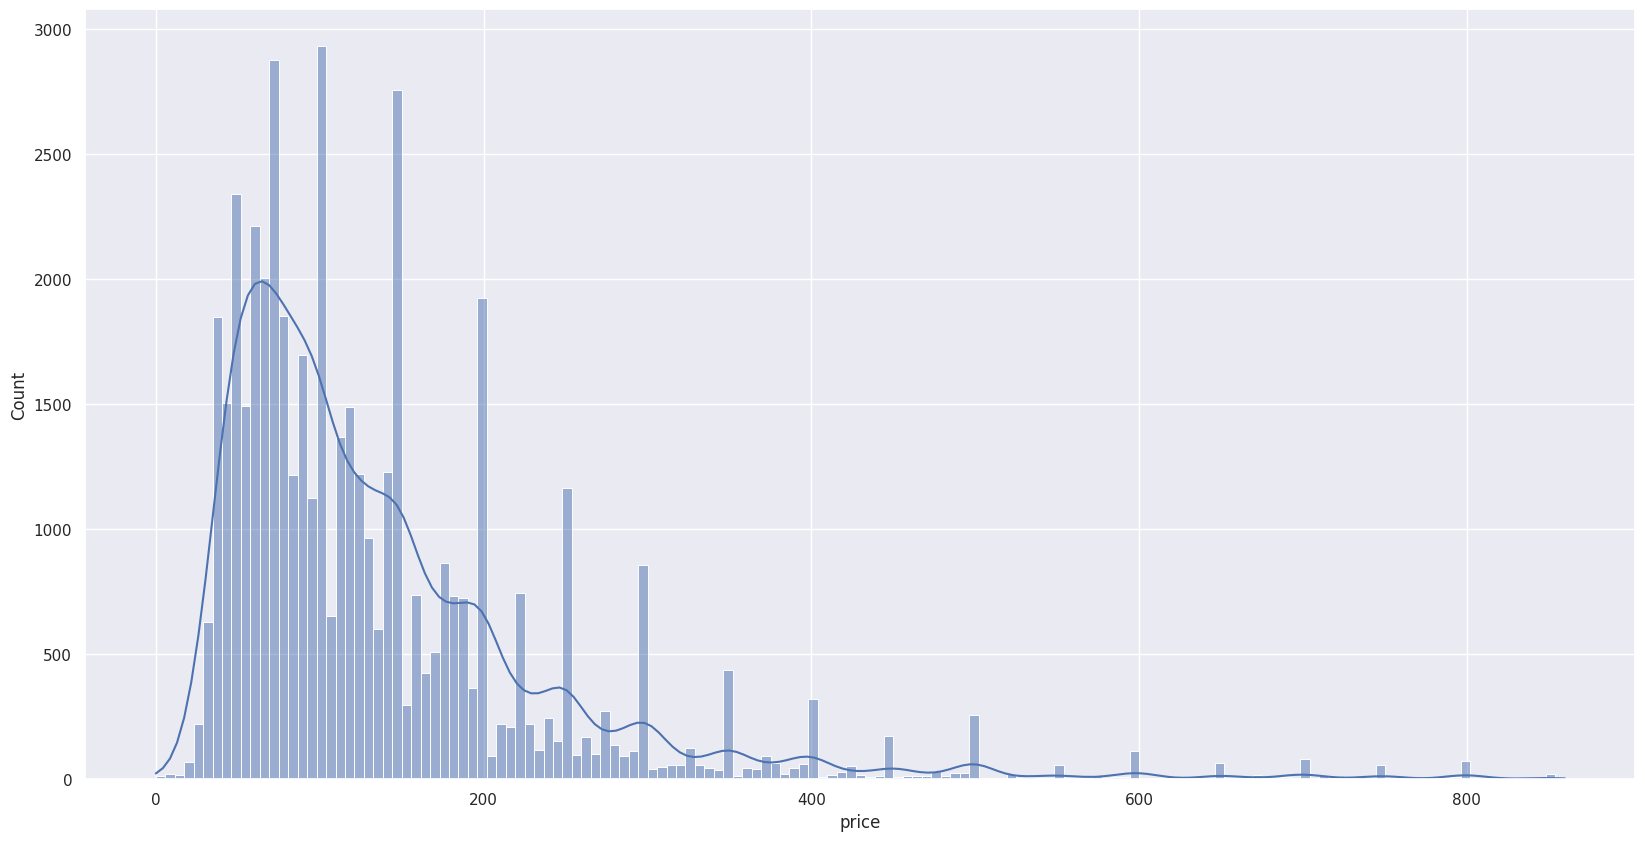

In [32]:
sns.histplot(df["price"], kde=True)

In [33]:
df.groupby("room_type")["room_type"].value_counts()

room_type        room_type      
Entire home/apt  Entire home/apt    25409
Private room     Private room       22326
Shared room      Shared room         1160
Name: room_type, dtype: int64

In [34]:
for key, value in df.groupby(by="room_type")["room_type"].value_counts().items():
  if value==1:
    df.loc[df["room_type"]==key[0], "room_type"] = "unknown_type"

df.groupby(by="room_type")["room_type"].value_counts()

room_type        room_type      
Entire home/apt  Entire home/apt    25409
Private room     Private room       22326
Shared room      Shared room         1160
Name: room_type, dtype: int64

In [35]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.210000,6.0,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.380000,2.0,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,1.262148,1.0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,18,2019-07-05,4.640000,1.0,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.100000,1.0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(

In [38]:
object_columns = df.select_dtypes("object").columns
object_columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

In [39]:
for column in object_columns:
  df[column] = df[column].astype("category")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  category
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  category
 5   price                           48895 non-null  float64 
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   last_review                     38843 non-null  category
 9   reviews_per_month               48895 non-null  float64 
 10  calculated_host_listings_count  48895 non-null  float64 
 11  availability_365                48895 non-null  int64   
dtypes: category(4), fl

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728754,0.054225,40.49979,40.69010,40.72307,40.762995,40.89245
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,138.746903,107.130617,0.00000,69.00000,106.00000,175.000000,860.00000
minimum_nights,48895.0,5.888782,8.886148,1.00000,1.00000,3.00000,5.000000,68.00000
number_of_reviews,48895.0,18.182350,29.341038,0.00000,1.00000,5.00000,20.000000,156.00000
reviews_per_month,48895.0,1.262148,1.232741,0.01000,0.28000,1.22000,1.480000,6.41000
calculated_host_listings_count,48895.0,2.235695,3.635322,1.00000,1.00000,1.00000,2.000000,34.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [42]:
df.pivot_table(values=["number_of_reviews", "availability_365", "price"],
               columns="room_type",
               aggfunc=np.mean)

room_type,Entire home/apt,Private room,Shared room
availability_365,111.920304,111.203933,162.000862
number_of_reviews,18.323704,18.215802,14.442241
price,190.404829,83.722141,66.252576


In [43]:
df.to_csv("airbnb_nyc_preprocessed.csv")

Text(0.5, 1.0, 'Data Types Graph')

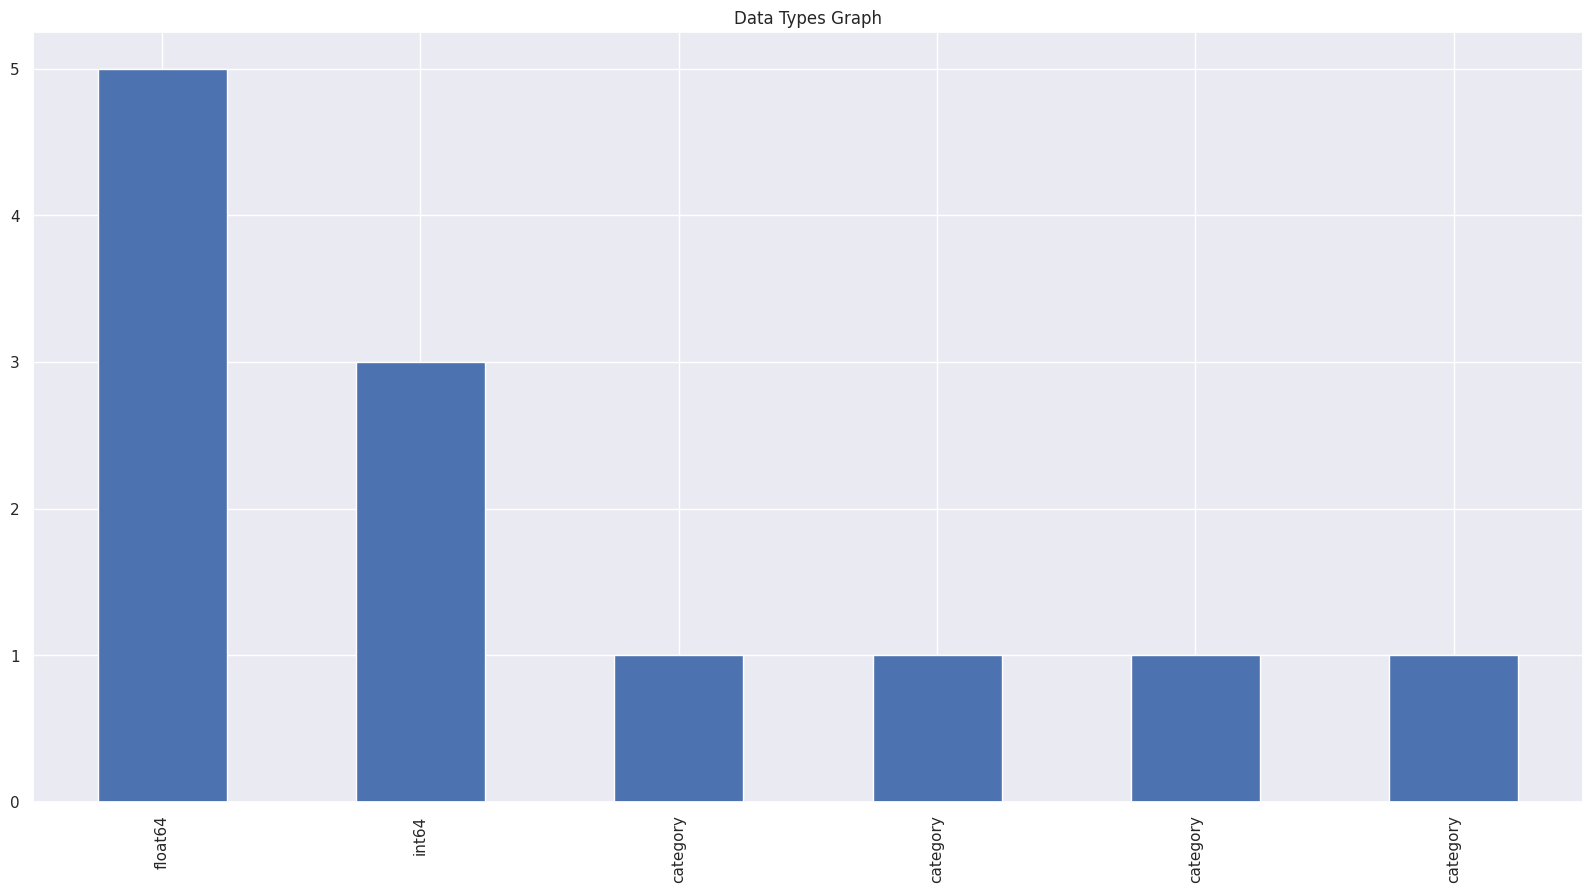

In [44]:
df.dtypes.value_counts().plot.bar().set_title("Data Types Graph")

Text(0.5, 1.0, 'Price VS Neighbourhood by Room Type')

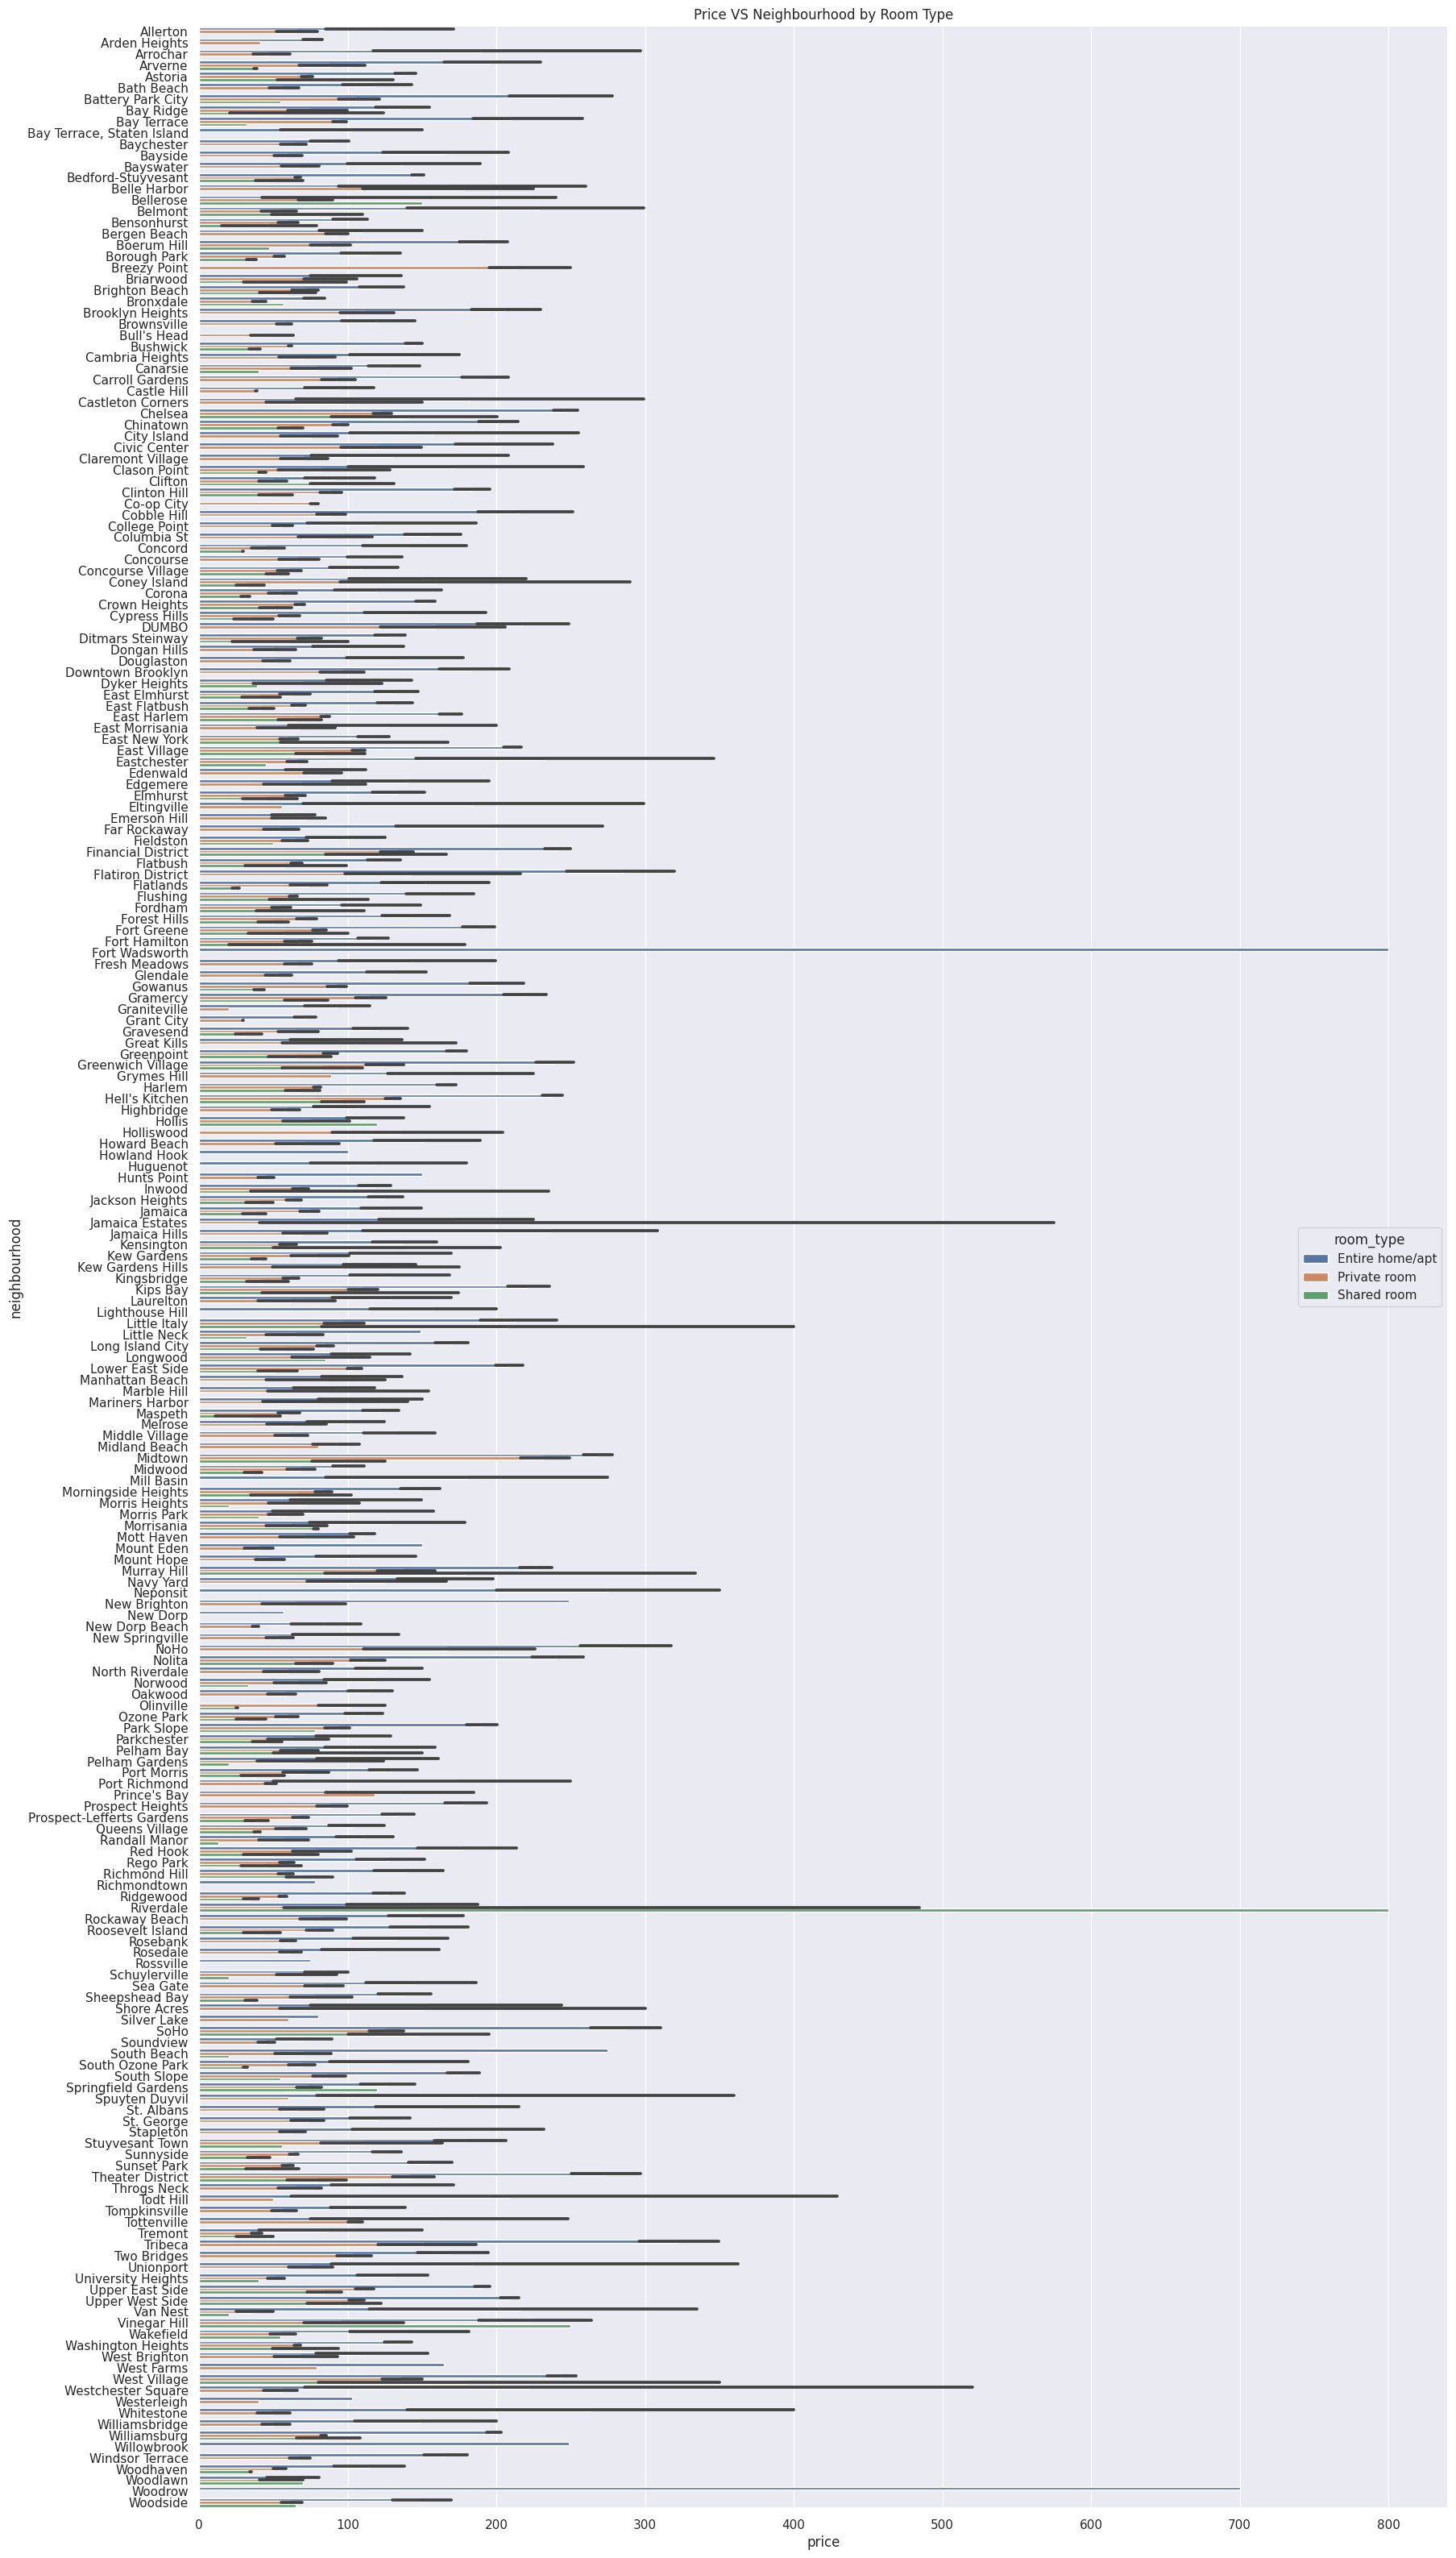

In [45]:
sns.set(rc={'figure.figsize':(20,40)})
sns.barplot(x="price", y="neighbourhood", hue="room_type", data=df).set_title("Price VS Neighbourhood by Room Type")

Text(0.5, 1.0, 'Price VS Number of Reviews')

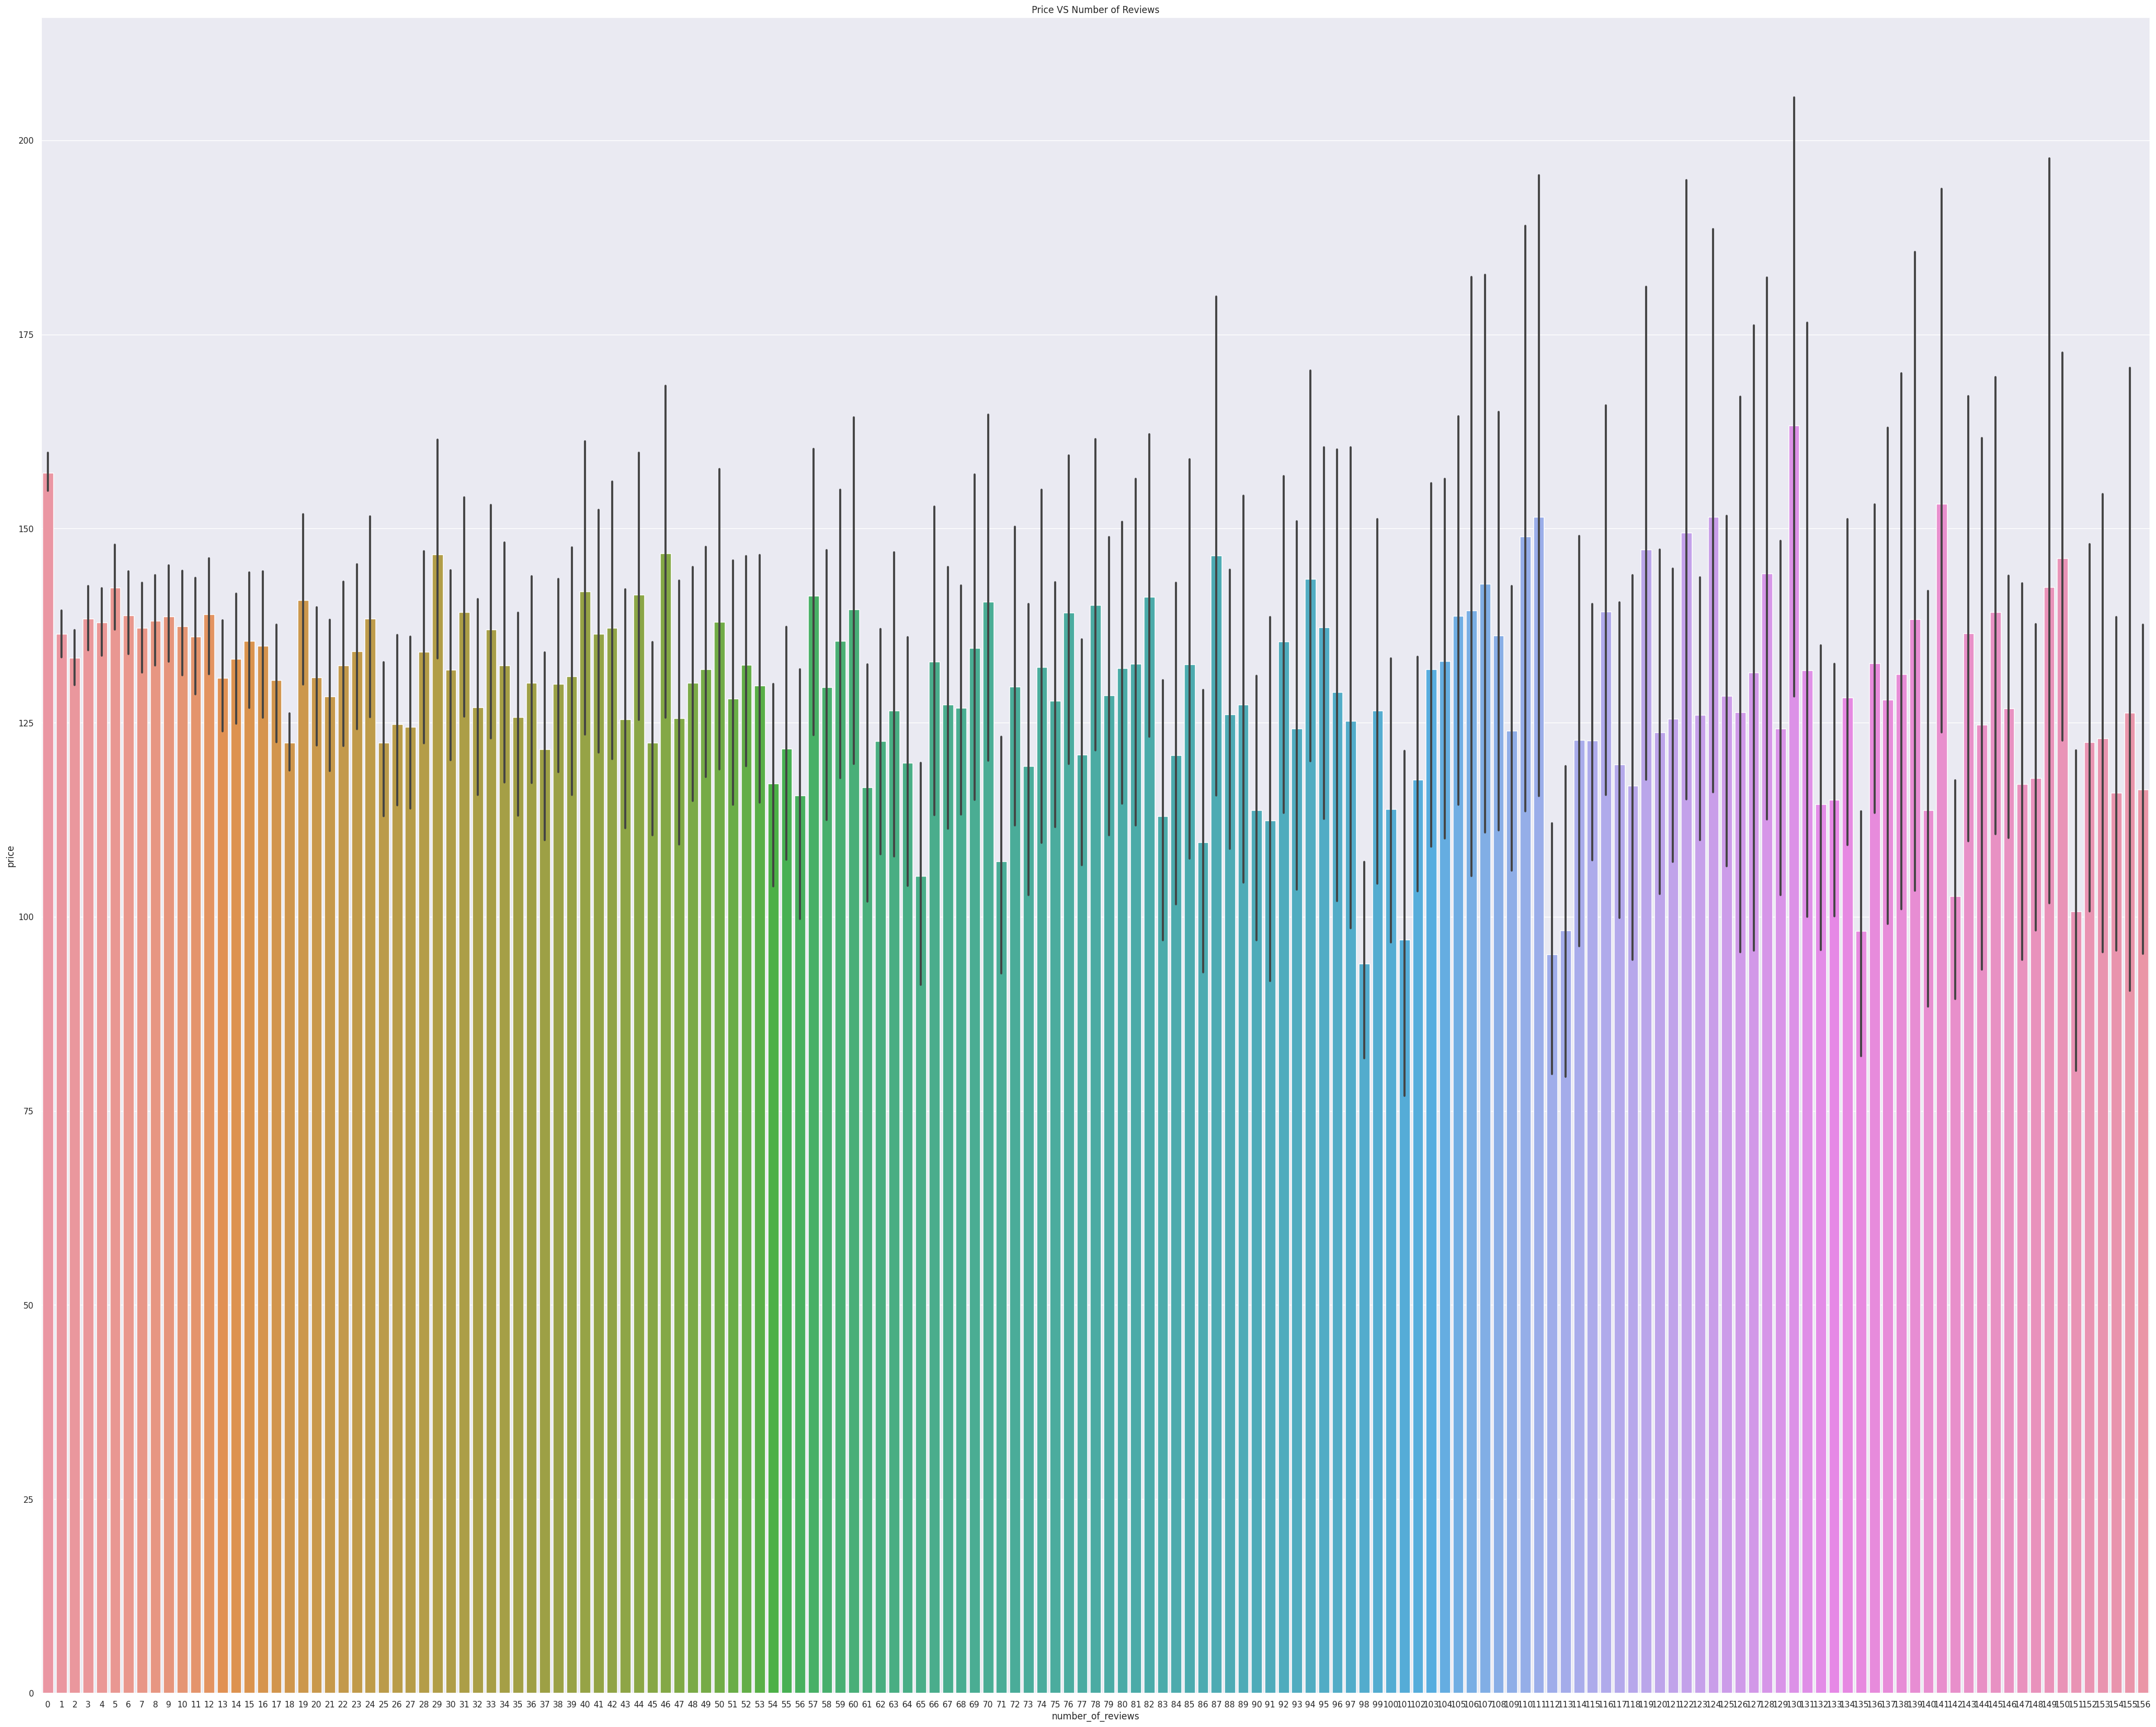

In [46]:
sns.set(rc={'figure.figsize':(50,40)})
sns.barplot(x="number_of_reviews", y="price", data=df).set_title("Price VS Number of Reviews")

Text(0.5, 1.0, 'Price VS Minimum Nights by Room Type')

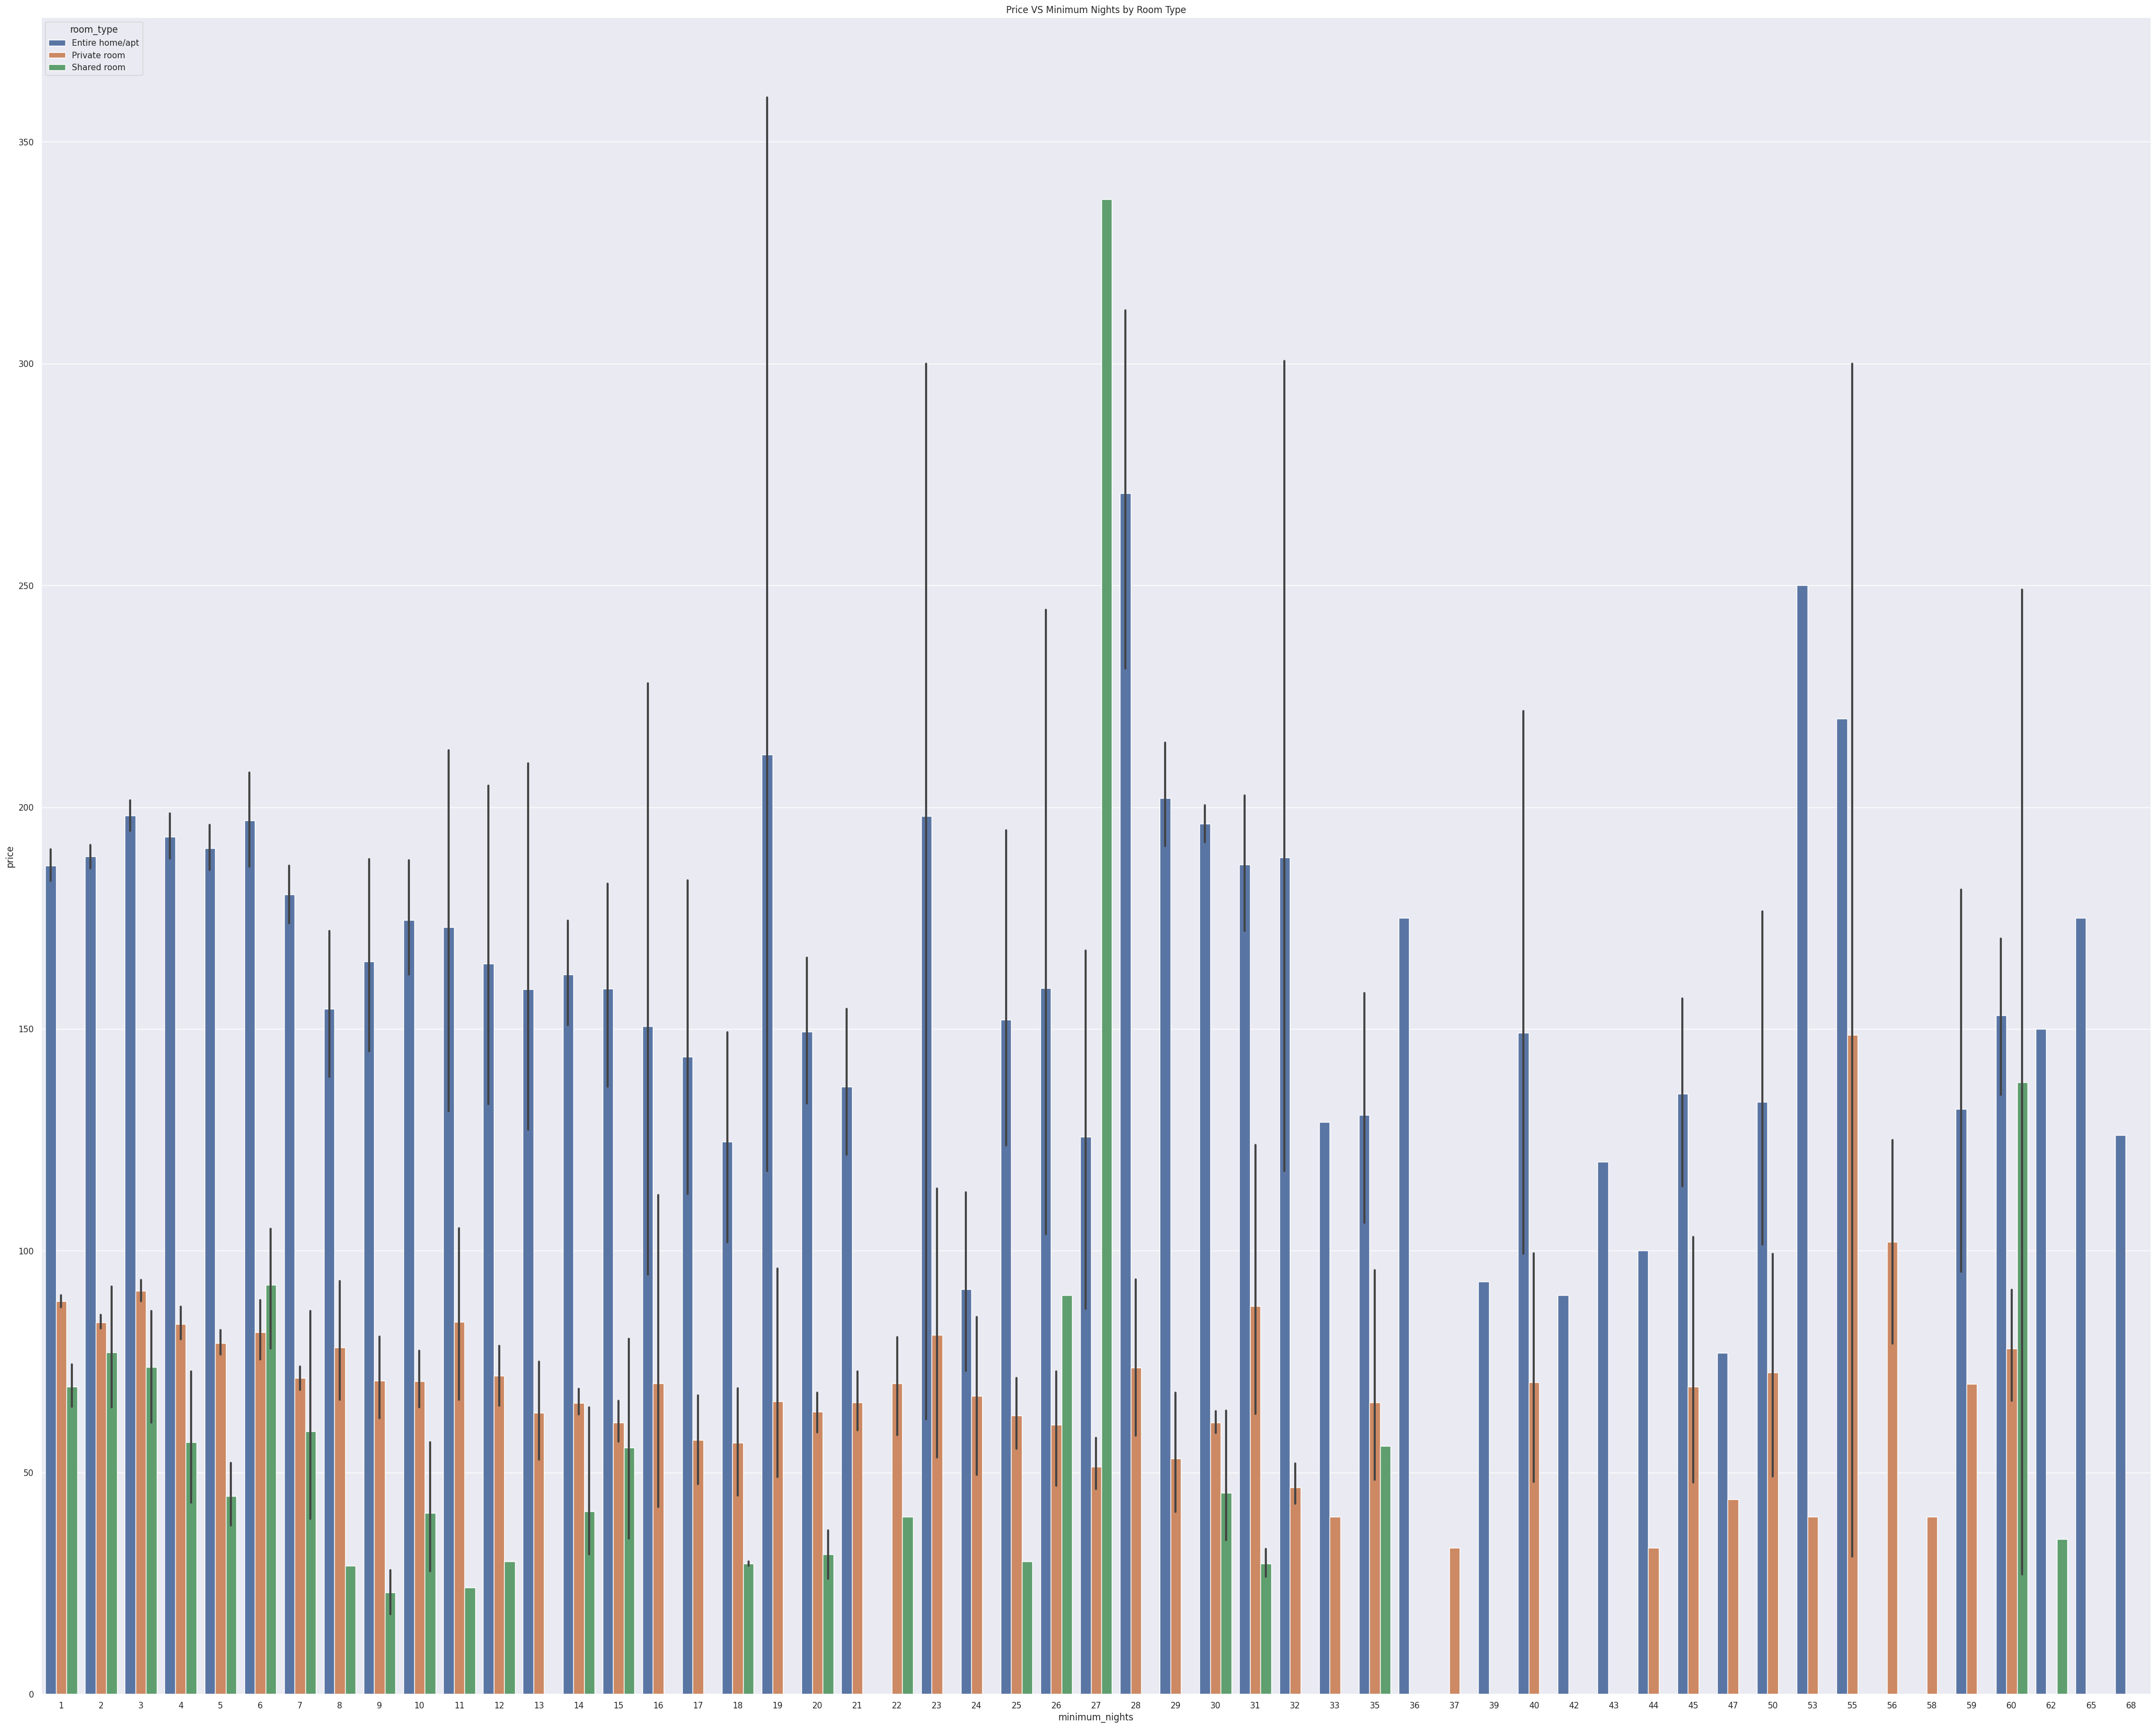

In [47]:
sns.set(rc={'figure.figsize':(50,40)})
sns.barplot(x="minimum_nights", y="price", hue="room_type", data=df).set_title("Price VS Minimum Nights by Room Type")

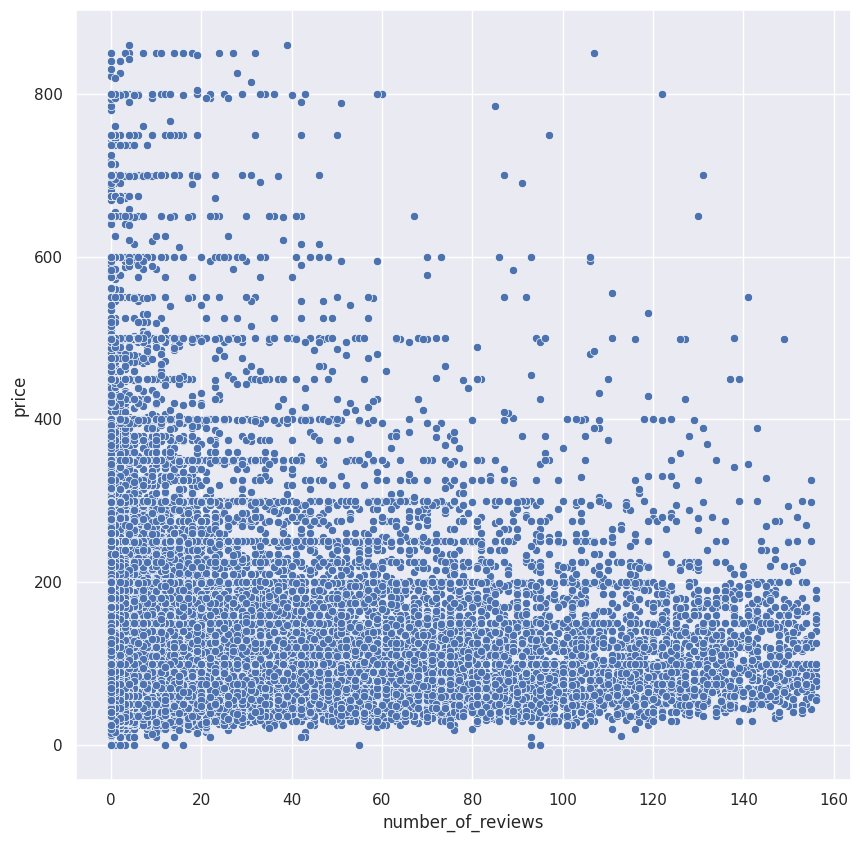

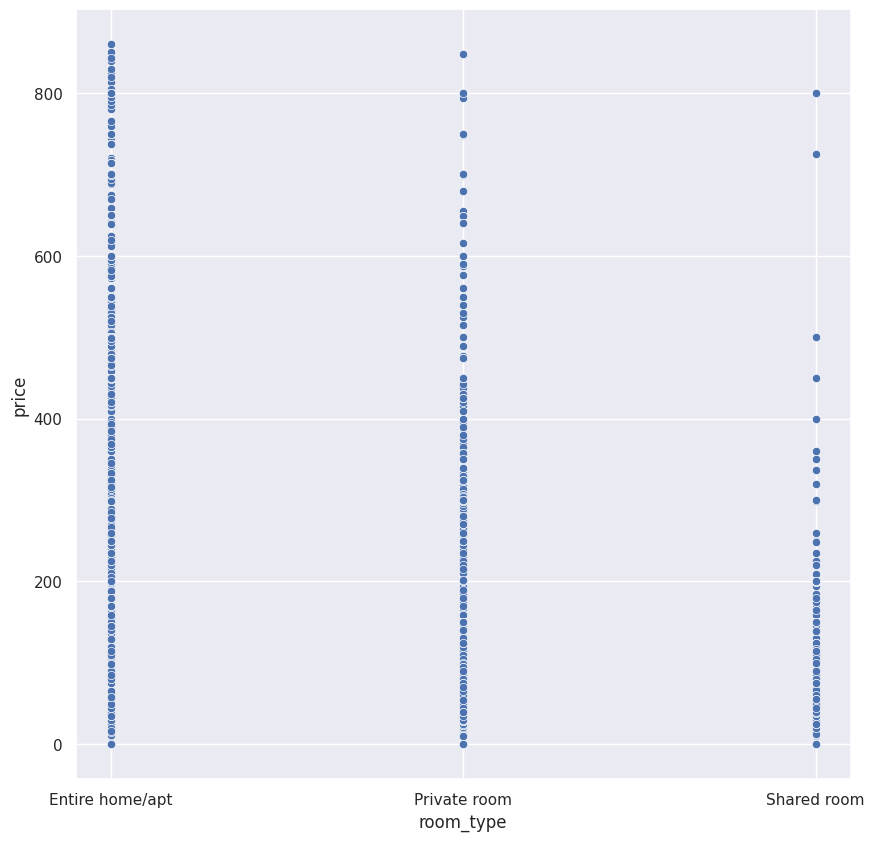

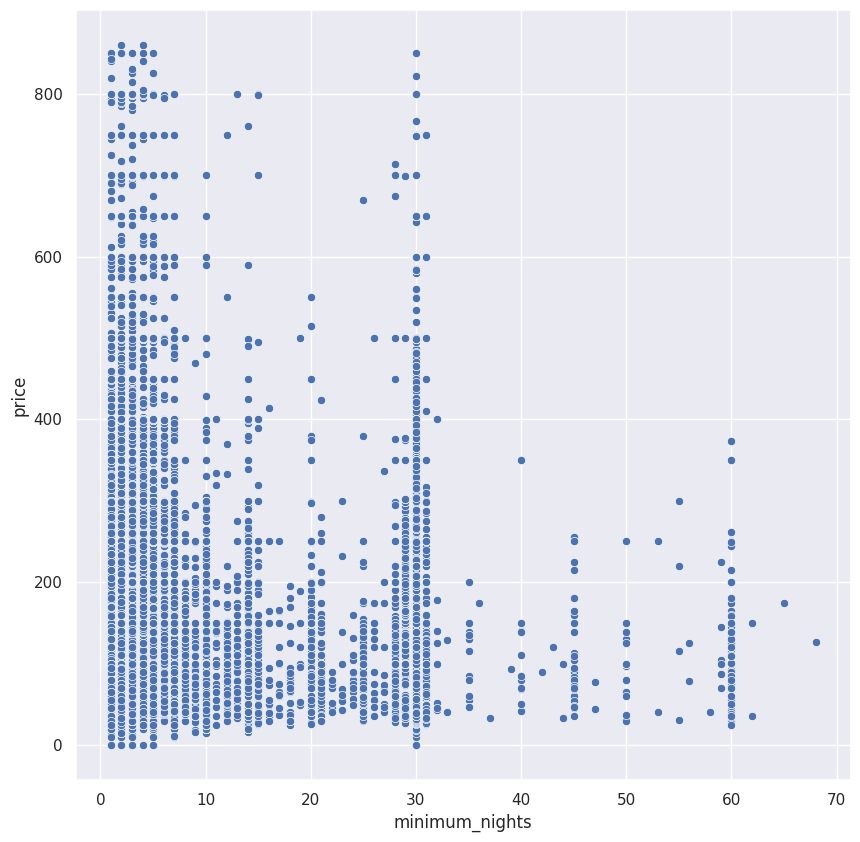

In [48]:
cols = ["number_of_reviews", "room_type", "minimum_nights"]

for col in cols:
  plt.figure(figsize=(10,10))
  sns.scatterplot(x=col, y="price", data=df)

<Axes: xlabel='price', ylabel='Count'>

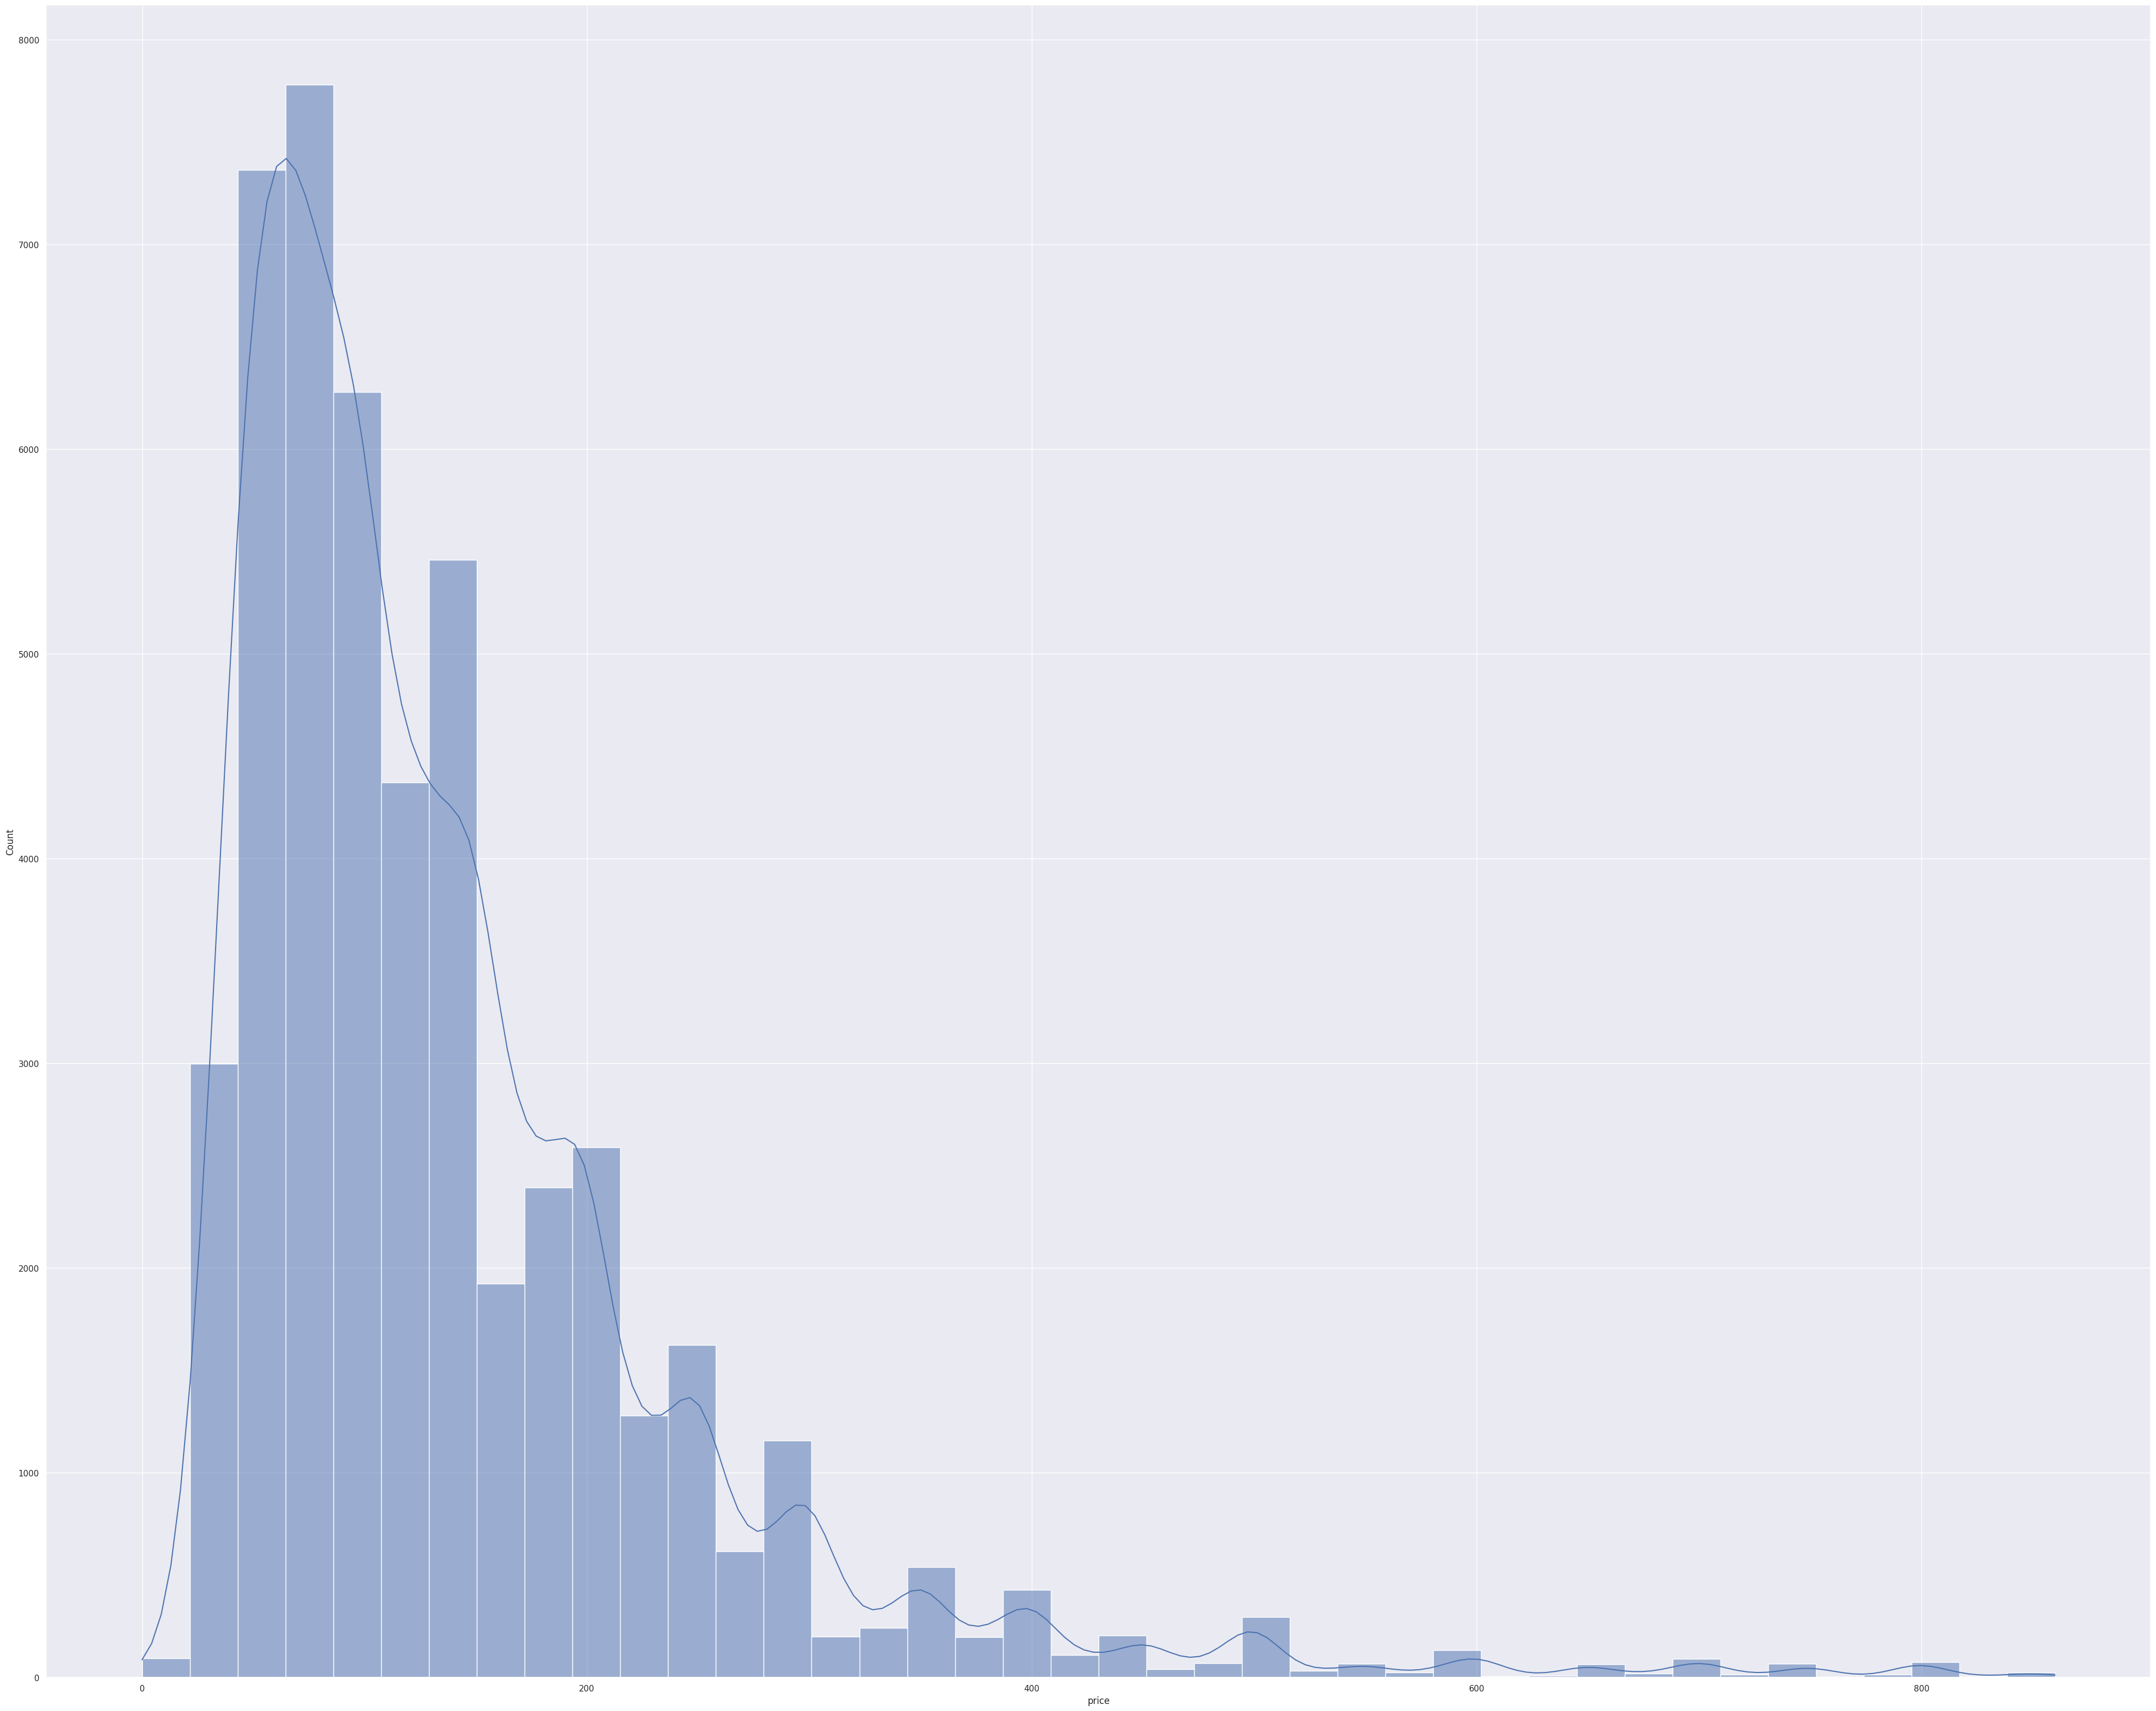

In [49]:
sns.histplot(df["price"], kde=True,bins=40) # bins= auto

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


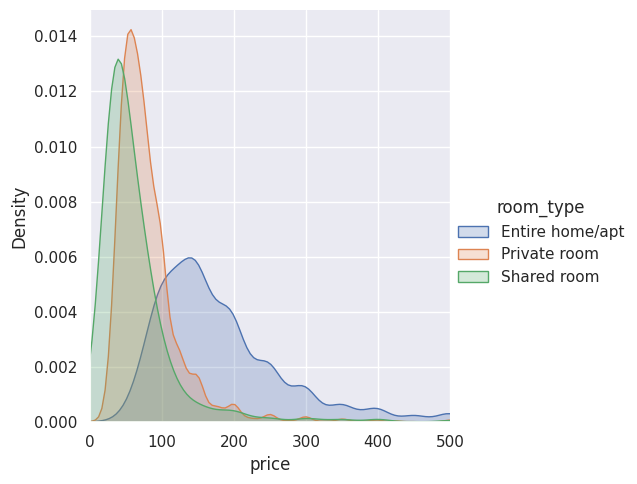

In [50]:
(sns.FacetGrid(df, hue="room_type", height=5, xlim=(0, 500)).map(sns.kdeplot, "price", shade=True).add_legend())

<ipython-input-51-c078bb934990>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


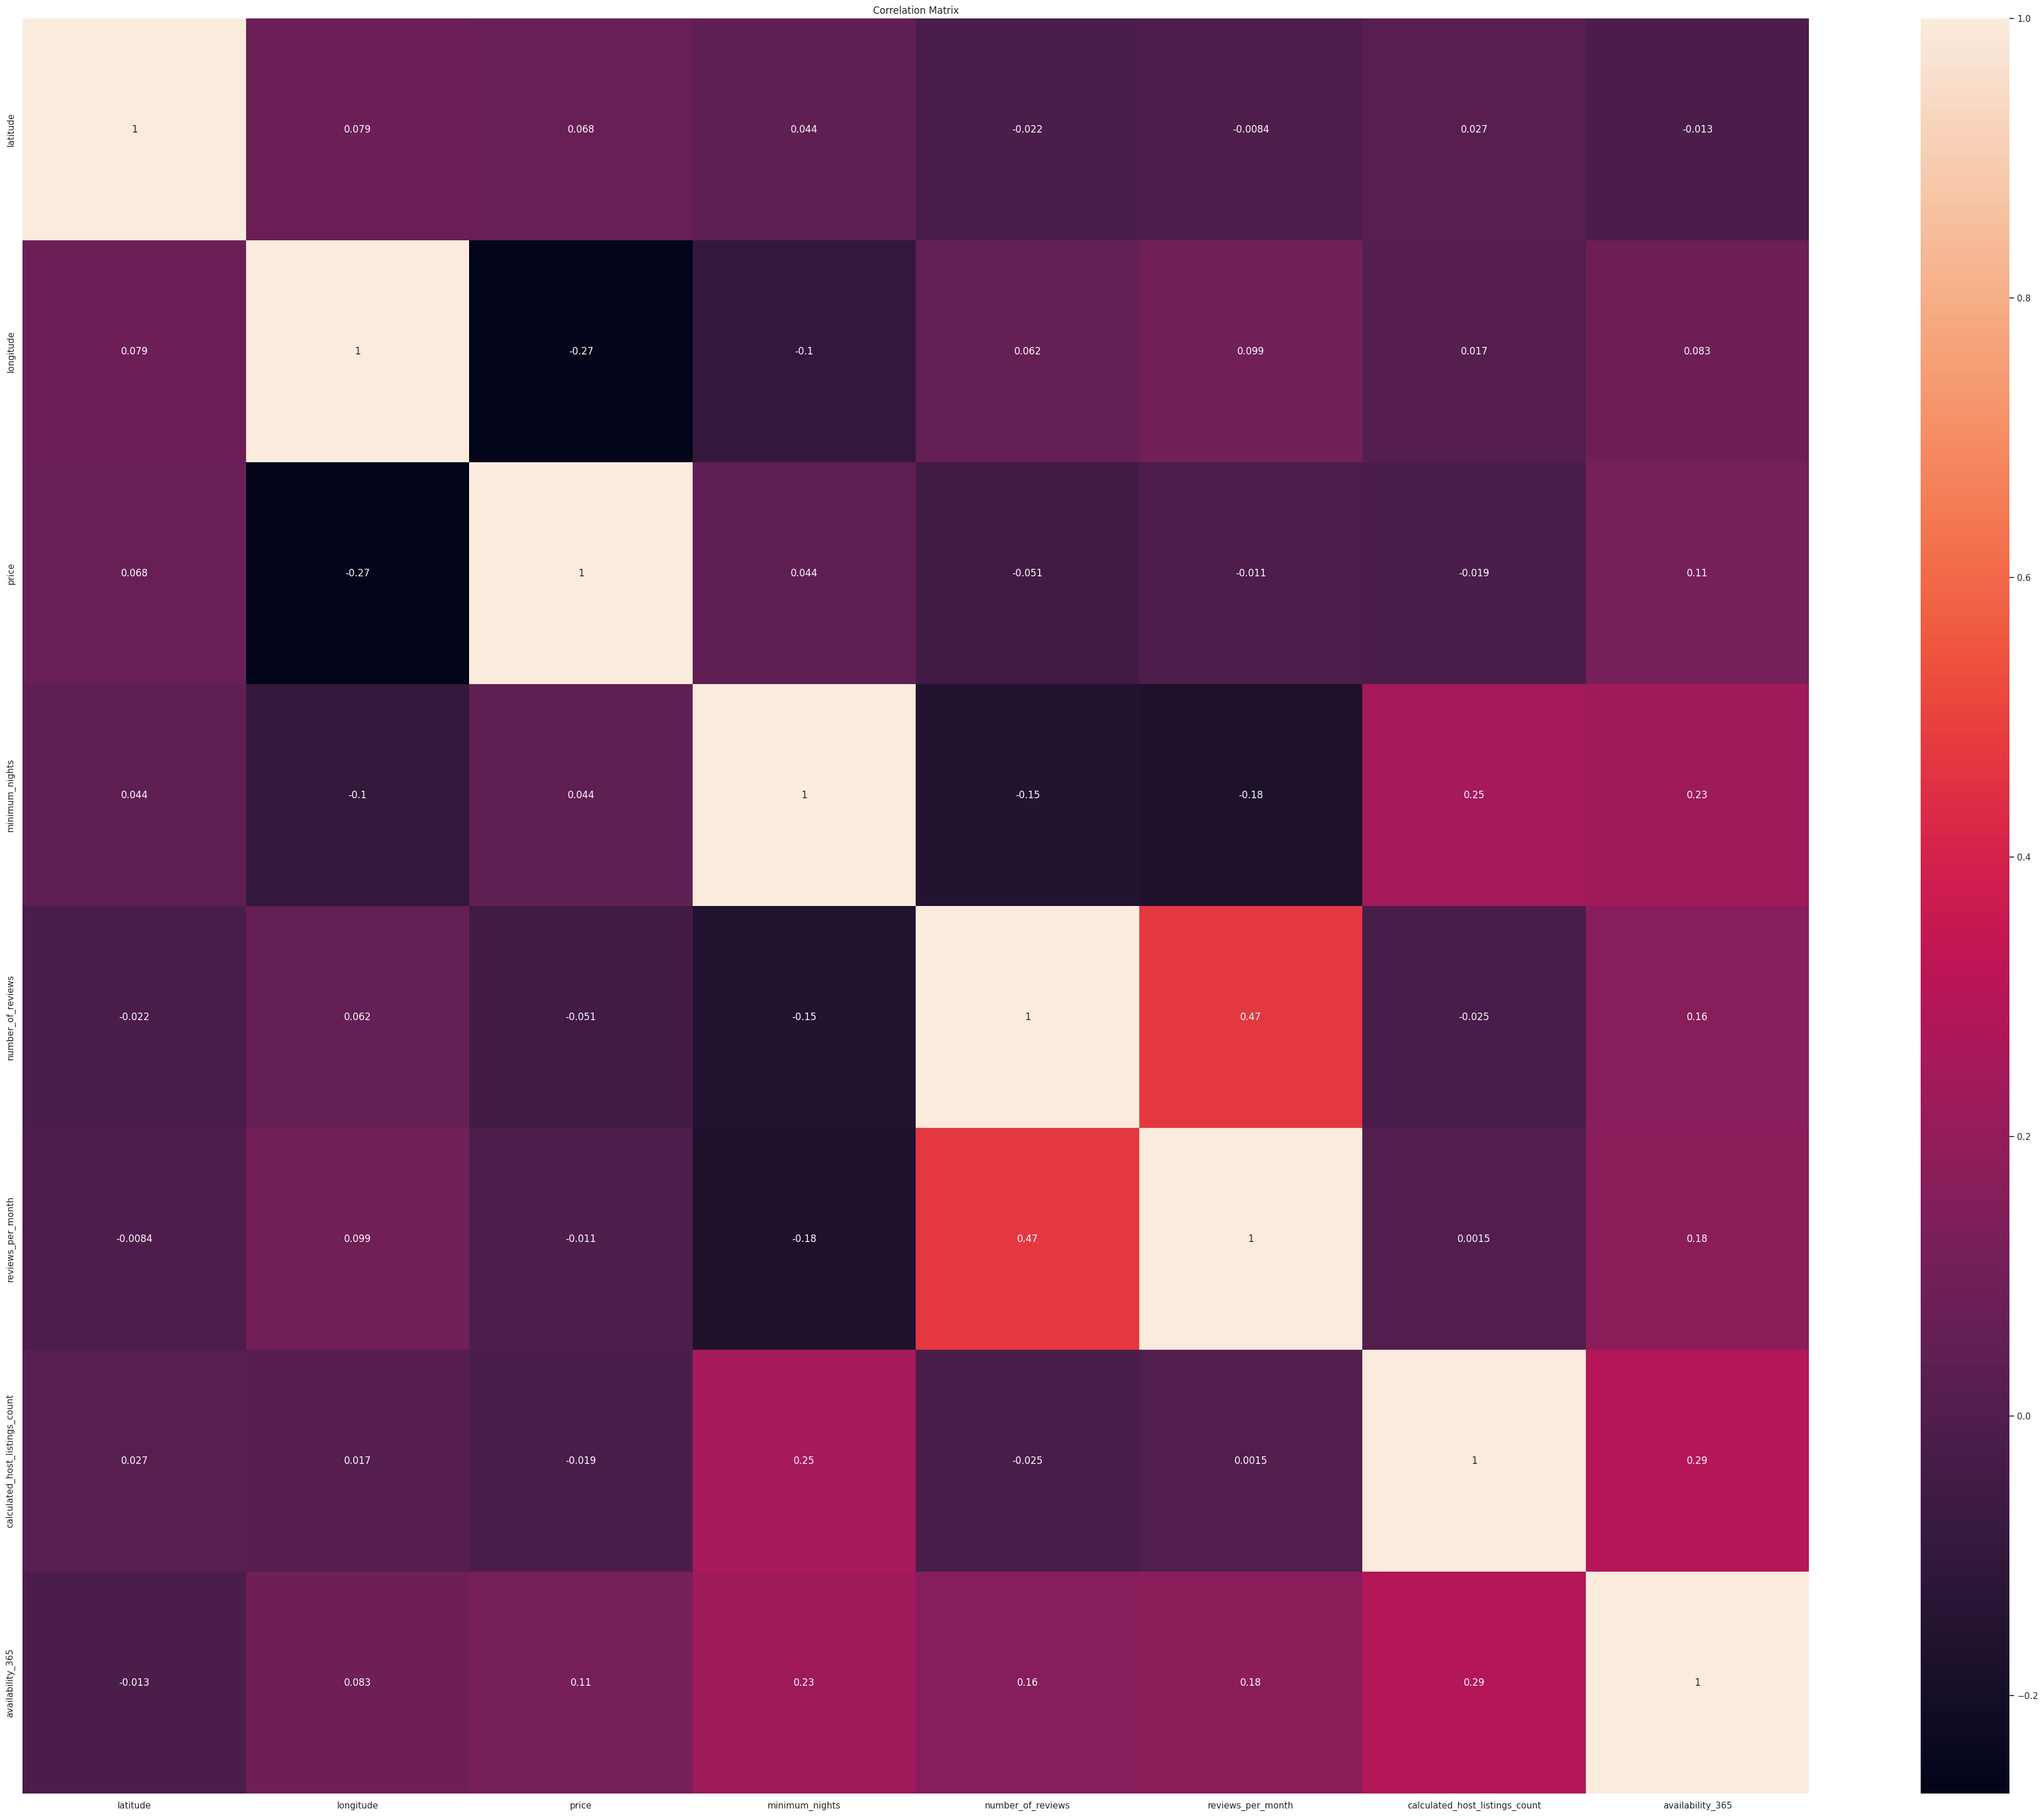

In [51]:
plt.title("Correlation Matrix")
sns.heatmap(df.corr(), annot=True);